In [3]:
import nglview as nv
import pytraj as pt 


print(dir(nv))


traj = pt.load(b, top=a); # "C499thistest_PDB.pdb"
nv.show_pytraj(traj)


['ASEStructure', 'ASETrajectory', 'BACKENDS', 'BiopythonStructure', 'DatasourceRegistry', 'FileStructure', 'HTMDTrajectory', 'IODataStructure', 'IOTBXStructure', 'MDAnalysisTrajectory', 'MDTrajTrajectory', 'NGLWidget', 'OpenbabelStructure', 'ParmEdTrajectory', 'PdbIdStructure', 'ProdyStructure', 'ProdyTrajectory', 'Psi4Structure', 'PyTrajTrajectory', 'QCElementalStructure', 'RdkitStructure', 'RosettaStructure', 'SchrodingerStructure', 'SchrodingerTrajectory', 'SimpletrajTrajectory', 'Structure', 'TextStructure', 'Trajectory', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_frontend', '_jupyter_nbextension_paths', '_version', 'adaptor', 'base', 'base_adaptor', 'color', 'component', 'config', 'data_source', 'datafiles', 'default', 'demo', 'interpolate', 'js_utils', 'layout', 'parameters', 'player', 'register_backend', 'remote_thread', 'representation', 'shape', 'show', 'show_ase', 'show_aset

NGLWidget(max_frame=5)

In [4]:
import nglview as nv 
import pytraj as pt
def rand_color():
  r = lambda: random.randint(0,255)
  return '#%02X%02X%02X' % (r(),r(),r())
def nglmask(traj, mask):
  return "@"+",".join([str(i) for i in traj.top.select(mask)])
def show_complex(traj, viewer_dic):
  viewer = nv.show_pytraj(traj)
  viewer[0].clear_representations()
  for i in viewer_dic:
    mask = nglmask(traj, i)
    viewer[0].add_representation(viewer_dic[i], selection=mask)
  viewer.center(selection=mask)
  viewer.stage.set_parameters(backgroundColor="#f9fcfd")
  return viewer



stride   = 1
masks    = {
  ":LIG,MDL<:15&!:SOL,T3P":"ribbon", 
  ":LIG,MDL<:5&!:SOL,T3P,WAT":"line", 
  ":LIG,MDL":"ball+stick", 
}; 
trajfile = "/storage006/yzhang/clean_acgui/TMP_FOLDERS/thistest/singleMD/C499thistest/C499thistest_TRJ.nc"; 
topfile  = "/storage006/yzhang/clean_acgui/TMP_FOLDERS/thistest/singleMD/C499thistest/C499thistest_PDB.pdb"; 
traj = pt.load(trajfile, top=topfile, stride=stride)
traj.top.set_reference(traj[0])
viewer = show_complex(traj, masks)
# print(dir(viewer))
viewer

NGLWidget(max_frame=5)

In [3]:
from BetaPose import utils, view
import nglview as nv 
import pytraj as pt


STRIDE   = 1
REPR    = {
  ":LIG,MDL<:15&!:SOL,T3P":"ribbon", 
  ":LIG,MDL<:5&!:SOL,T3P,WAT":"line", 
  ":LIG,MDL":"ball+stick", 
}; 

trajfile = "/storage006/yzhang/clean_acgui/TMP_FOLDERS/thistest/singleMD/C499thistest/C499thistest_TRJ.nc"; 
topfile  = "/storage006/yzhang/clean_acgui/TMP_FOLDERS/thistest/singleMD/C499thistest/C499thistest_PDB.pdb"; 

traj = pt.load(trajfile, top=topfile, stride=STRIDE);
traj.top.set_reference(traj[0]); 
viewer = view.show_complex(traj, REPR); 
dist, info = utils.PairwiseDistance(traj, ":LIG&!@H=", ":LIG<:6&@CA,C,N,O,CB")

print(dir(utils))
print(dist)
print(info)


# def add_distance(partner1, partner2):
#   for i, j in zip(partner1, partner2):
#     viewer[0].add_representation("distance", atomPair=[[f"@{i}", f"@{j}"]], 
#                                  color="blue", label_color="black", label_fontsize=0); 
#   return viewer

viewer = view.add_distance(viewer, info["gp1_ids"], info["gp2_ids"])
viewer

NameError: name 'self' is not defined

In [11]:
from BetaPose import utils, view
import nglview as nv 
import pytraj as pt
def nglmask(traj, mask):
  return "@"+",".join([str(i) for i in traj.top.select(mask)])
class TrajectoryViewer: 
  def __init__(self, traj):
    self.traj = traj; 
    self.viewer = nv.show_pytraj(traj); 
    
  def show_complex(self, viewer_dic):
    self.viewer[0].clear_representations(); 
    for rep in viewer_dic:
      mask = nglmask(self.traj, rep); 
      self.viewer[0].add_representation(viewer_dic[rep], selection=mask); 
    self.viewer.center(selection = mask); 
    self.viewer.stage.set_parameters(backgroundColor="#f9fcfd"); 
    self.viewer.stage.set_parameters(backgroundColor="#ffffff"); 
    return self.viewer
  def add_distance(self, partner1, partner2):
    for i, j in zip(partner1, partner2):
      self.viewer[0].add_representation("distance", atomPair=[[f"@{i}", f"@{j}"]],
                                   color="blue", label_color="black", label_fontsize=0.1);
    return self.viewer

  
STRIDE   = 1

# mask_lig = utils.getmask(traj, ":71&:PHE"); 
# mask_lig = ":71&:PHE"; 
mask_superpose = utils.getmask(traj, f"{mask_lig}<:6&@CA&!{mask_lig}");
mask_lig_pair1 = utils.getmask(traj, f"{mask_lig}&!@H="); 
mask_lig_pair2 = utils.getmask(traj, f"{mask_lig}<:6&@CA,C,N,O,CB&!{mask_lig}"); 

REPR    = {
  f"{mask_lig}<:100&!:SOL,T3P":"ribbon", 
  f"{mask_lig}<:5&!:SOL,T3P,WAT":"line", 
  f"{mask_lig}":"ball+stick", 
}; 


########################
trajid = "C008bfl1sim5"
sessid = trajid[4:]
trajfile = f"/storage006/yzhang/clean_acgui/TMP_FOLDERS/{sessid}/singleMD/{trajid}/{trajid}_ATJ.nc"; 
topfile  = f"/storage006/yzhang/clean_acgui/TMP_FOLDERS/{sessid}/singleMD/{trajid}/{trajid}_PDB.pdb"; 
traj = pt.load(trajfile, top=topfile, stride=STRIDE);
traj.top.set_reference(traj[0]); 

mask_lig = utils.getmask(traj, ":LIG&!@CA,CB,C,N,O"); 

traj.superpose(":LIG<:5&@CA"); 
# traj.center(":LIG<:5&@CA"); 
########################



tv = TrajectoryViewer(traj); 
tv.show_complex(REPR); 
dist, info = utils.PairwiseDistance(traj, mask_lig_pair1, mask_lig_pair2)
tv.add_distance(info["gp1_ids"], info["gp2_ids"])
tv.viewer
# from nglview.contrib.movie import MovieMaker
# download_folder = '/storage006/yzhang/tests/'
# output = 'test.gif'
# mov = MovieMaker(tv.viewer, download_folder=download_folder, output=output)
# mov.make()

NGLWidget(max_frame=200)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.spatial import distance
from scipy import linalg

# Sum of the frames are they similar in values. 
print(f"Mean: {dist.mean()} ; Sum: {dist.sum()}")


sums = np.sum(dist, axis=0)
print(len(sums))
print(f"Mean: {sums.mean()} ; Std: {sums.std()}; Sum: {sums.sum()} , test = {dist.sum()/sums.mean()}, {dist.shape}")

print(6/200)

# plt.plot(sums)

# print(np.cov(dist.T))


# plt.pcolormesh(range(dist.shape[1]), range(dist.shape[0]), dist, cmap="inferno")
# plt.pcolormesh(range(201), range(33), dist, cmap="inferno")
# plt.pcolormesh(range(36), range(36), np.cov(theinv), cmap="inferno")
# print(dist.cov())
# print(dir(dist))


thecov = np.cov(dist)
theinv = linalg.inv(thecov)
meandist = dist.mean(axis=1)

# print(theinv)
# print(dist.shape[1])

def testmah(dist_mtx):
  thecov = np.cov(dist_mtx); 
  theinv = linalg.inv(thecov); 
  meandist = dist_mtx.mean(axis=1); 
  outarray = []
  for i in range(dist_mtx.shape[0]):
    disti = dist_mtx[:, i]; 
    thedist = distance.mahalanobis(meandist, disti, theinv)
    outarray.append(thedist)
  return np.array(outarray)
mahs = testmah(dist)
rmsd = pt.rmsd(traj, ":LIG&!@H="); 
print()
print(f"RMSD: {rmsd.mean()}, dist: {dist.mean()}, Mah: {mahs.mean()}")
print(f"RMSD: {rmsd.mean()}, dist: {dist.std()}, Mah: {mahs.std()}")
print(f"RMSD: {rmsd.mean()}, dist: {dist.mean()}, Mah: {mahs.mean()}")
print(f"RMSD: {rmsd.mean()}, dist: {dist.mean()}, Mah: {mahs.mean()}")
print(f"RMSD: {rmsd.mean()}, dist: {dist.std()/dist.mean()}, Mah: {mahs.std()/mahs.mean()}")


NameError: name 'dist' is not defined

In [4]:
import numpy as np 
import pytraj as pt
from scipy.spatial import distance
from scipy import linalg
from BetaPose import utils, view
import pandas as pd 
import os.path

def testmah(dist_mtx):
  thecov = np.cov(dist_mtx); 
  theinv = linalg.inv(thecov); 
  meandist = dist_mtx.mean(axis=1); 
  # meandist = dist_mtx[:,0]; 
  outarray = []
  for i in range(dist_mtx.shape[0]):
    disti = dist_mtx[:, i]; 
    thedist = distance.mahalanobis(meandist, disti, theinv)
    outarray.append(thedist)
  return np.array(outarray)
def MSD(arr):
  """
    Mean Spacing Deviation
  """
  return np.array(arr).std(axis=1).mean(); 
def MSCV(arr):
  """
    Mean Spacing Coefficient of Variation
  """
  std = np.array(arr).std(axis=1); 
  mean = np.array(arr).mean(axis=1); 
  mscv = (std/mean).mean()
  return min(mscv, 1); 


STRIDE   = 1
RMSLST = []
DSTLST = []
MSDLST = []
MVCLST = []
TRAJID = []
c = 0
for i in range(1, 6):
  for j in range(1, 15): 
    trajid = f"C{j:03d}bfl1sim{i}"; 
    sessid = trajid[4:]; 
    if os.path.isfile(f"/storage006/yzhang/clean_acgui/TMP_FOLDERS/{sessid}/singleMD/{trajid}/{trajid}_ATJ.nc"): 
      trajfile = f"/storage006/yzhang/clean_acgui/TMP_FOLDERS/{sessid}/singleMD/{trajid}/{trajid}_ATJ.nc"; 
    elif os.path.isfile(f"/storage006/yzhang/clean_acgui/TMP_FOLDERS/{sessid}/singleMD/{trajid}/{trajid}_TRJ.nc"): 
      trajfile = f"/storage006/yzhang/clean_acgui/TMP_FOLDERS/{sessid}/singleMD/{trajid}/{trajid}_TRJ.nc"; 
    else: 
      print(f"Not found trajectory ID {trajid}"); 
      continue
      
    topfile  = f"/storage006/yzhang/clean_acgui/TMP_FOLDERS/{sessid}/singleMD/{trajid}/{trajid}_PDB.pdb"; 
    
    traj = pt.load(trajfile, top=topfile, stride=STRIDE);
    traj.top.set_reference(traj[0]); 
    
    mask_lig = utils.getmask(traj, ":LIG&!@CA,CB,C,N,O"); 
    mask_superpose = utils.getmask(traj, f"{mask_lig}<:6&@CA&!{mask_lig}");
    mask_lig_pair1 = utils.getmask(traj, f"{mask_lig}&!@H="); 
    mask_lig_pair2 = utils.getmask(traj, f"{mask_lig}<:6&@CA,C,N,O,CB&!{mask_lig}"); 
    
    traj.superpose(mask_superpose);
    # traj.center(mask_superpose);

    mask_lig_pair1 = utils.getmask(traj, f"{mask_lig}&!@H=")
    mask_lig_pair2 = utils.getmask(traj, f"{mask_lig}<:6&@CA,C,N,O,CB&!{mask_lig}")
    dist, info = utils.PairwiseDistance(traj, mask_lig_pair1, mask_lig_pair2)
    dist += 0.0000001
    
    try: 
      mahs = testmah(dist)
    except: 
      mahs = np.zeros([dist.shape[0]])
    rmsds = pt.rmsd(traj, mask_lig_pair1, nofit=True); 
    
    rmsd = rmsds.mean()
    mdist = dist.mean(); 
    msd = MSD(dist); 
    mscv = MSCV(dist); 
    TRAJID.append(trajid); 
    RMSLST.append(rmsd)
    DSTLST.append(mdist)
    MSDLST.append(msd)
    MVCLST.append(mscv)
    print(f"{trajid}:{c:>3d} - RMSD: {rmsd:.2f} | Dist: {mdist:>5.2f} | MSD: {msd:>6.3f} | MSCV: {mscv:4.3f} | Mah: {mahs.mean() - MSCV(dist)*mahs.mean():>5.2f} ;")
    c+=1
    
finallst = pd.DataFrame([])
finallst["TRAJ"] = TRAJID
finallst["RMS"] = RMSLST
finallst["DIST"] = DSTLST
finallst["MSD"] = MSDLST
finallst["MSCV"] = MVCLST
# print(finallst)

C001bfl1sim1:  0 - RMSD: 2.22 | Dist:  5.54 | MSD:  0.586 | MSCV: 0.107 | Mah:  5.63 ;
C002bfl1sim1:  1 - RMSD: 2.73 | Dist:  6.59 | MSD:  1.332 | MSCV: 0.198 | Mah:  5.16 ;
C003bfl1sim1:  2 - RMSD: 2.27 | Dist:  5.86 | MSD:  0.577 | MSCV: 0.100 | Mah:  5.13 ;
C004bfl1sim1:  3 - RMSD: 3.95 | Dist:  6.94 | MSD:  0.824 | MSCV: 0.115 | Mah:  5.52 ;
C005bfl1sim1:  4 - RMSD: 2.34 | Dist:  5.91 | MSD:  0.771 | MSCV: 0.130 | Mah:  4.88 ;
C006bfl1sim1:  5 - RMSD: 4.16 | Dist:  6.92 | MSD:  0.873 | MSCV: 0.126 | Mah:  5.85 ;
C007bfl1sim1:  6 - RMSD: 1.74 | Dist:  5.52 | MSD:  0.745 | MSCV: 0.134 | Mah:  5.16 ;
C008bfl1sim1:  7 - RMSD: 1.59 | Dist:  5.39 | MSD:  0.606 | MSCV: 0.112 | Mah:  5.28 ;
C009bfl1sim1:  8 - RMSD: 1.70 | Dist:  5.24 | MSD:  0.679 | MSCV: 0.129 | Mah:  5.09 ;
C010bfl1sim1:  9 - RMSD: 1.92 | Dist:  5.31 | MSD:  0.613 | MSCV: 0.115 | Mah:  5.11 ;
C011bfl1sim1: 10 - RMSD: 2.87 | Dist:  6.09 | MSD:  0.636 | MSCV: 0.106 | Mah:  5.90 ;
C012bfl1sim1: 11 - RMSD: 3.79 | Dist:  6.33

[[1.         0.90412613 0.50285042]
 [0.90412613 1.         0.58074603]
 [0.50285042 0.58074603 1.        ]]
(100,)


/storage006/yzhang/miniconda3/envs/mlprod/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


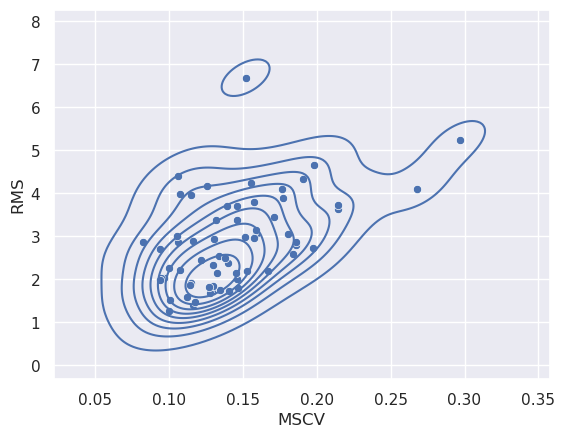

In [14]:
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
vals = finallst[["RMS", "DIST", "MSCV"]]



# sns.displot(vals[['RMS', "DIST"]], binwidth=0.1)
# sns.displot(vals[['MSD', "MSCV"]], binwidth=0.01)
x = np.corrcoef(vals.T)
print(x)

pca = PCA(n_components=2); 
pca.fit(vals[["MSCV", "RMS"]])
pca_x = np.linspace(0,0.4,100)
pca_y = np.linspace(0,4,100)
# pca_vals = np.meshgrid()
# print(pca_vals)

pca_vals = pca.transform([[i,j] for i, j in zip(pca_x, pca_y)])
print(pca_y.shape)

x = pd.DataFrame(x, columns=vals.columns, index=vals.columns)
# sns.heatmap(x, cmap="inferno", vmin=0, square=True)
# sns.displot(vals, binwidth=0.0)
# sns.pairplot(vals)


axis = sns.kdeplot(vals[['RMS', "MSCV"]], x="MSCV", y="RMS")

axis = sns.scatterplot(vals[['RMS', "MSCV"]], x="MSCV", y="RMS")


(54, 5)


[(0.0, 25.0)]

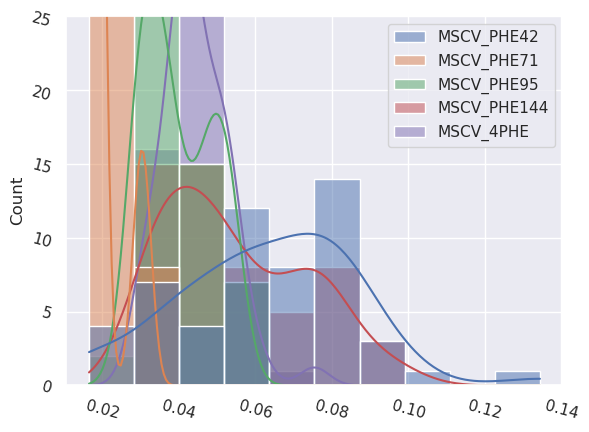

In [271]:
import seaborn as sns; sns.set()

# MSCVlst = pd.DataFrame()
MSCVlst["MSCV_4PHE"] = finallst[["MSCV"]]

print(MSCVlst.shape)
# sns.histplot(rmslist)
# axis = sns.histplot(MSCVlst['MSCV_CE='], kde=True, bins=10)
dataset = MSCVlst #["MSCV_4850"]; 
# print(dataset)
# axis = sns.histplot(dataset, kde=True, binwidth=dataset.mean()/10)
axis = sns.histplot(dataset, kde=True, bins=10)
axis.tick_params(rotation=-15)
axis.set(ylim=(0, 25))
# for i in MSCVlst:
#   print(MSCVlst[i])


(54, 5)


[(0.0, 25.0)]

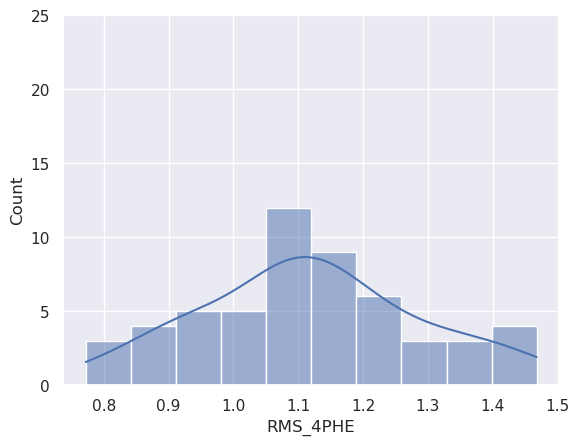

In [275]:
import seaborn as sns; sns.set()

# rmslist=pd.DataFrame()
rmslist["RMS_4PHE"] = finallst[["RMS"]]

print(rmslist.shape)
dataset = rmslist["RMS_4PHE"]; 
# sns.histplot(rmslist, kde=True, bins=10)
axis = sns.histplot(dataset, kde=True, bins=10)

# axis = sns.histplot(dataset, kde=True, binwidth=dataset.mean()/10)
axis.set(ylim=(0, 25))


In [90]:
print(rmslist.to_csv())
print(MSCVlst.to_csv())

,RMS_4PHE,RMS_PHE95
0,1.1515443267198666,0.057868493485669026
1,1.4054504550467224,0.05483595869623932
2,1.1127613072164972,0.058695296461053946
3,1.0299449537741785,0.05647110212071236
4,0.7722482918341959,0.06888931582242336
5,1.0906730338087864,0.0705648967617673
6,1.243996191820365,0.055796368988363855
7,1.2376591424273755,0.05649532438858865
8,1.1277267925564805,0.05843241633015211
9,1.0633874818019673,0.07852773130105986
10,0.8228174269769801,0.07179021475885364
11,0.7978408891177475,0.06499038880567304
12,1.4293510375350695,0.0706265613603061
13,1.0684116803673551,0.05744631647685705
14,1.1157968373333265,0.059311788449126115
15,0.9009172766420224,0.05983317356647233
16,1.2402650638545536,0.05746765990966083
17,1.2028678791159635,0.05804498414986552
18,0.9826657732747126,0.05286947549448361
19,0.89441908617821,0.053310981875831095
20,1.127192541250664,0.05726710118989524
21,1.1474405035606328,0.05871744395849416
22,1.162568515299635,0.0643501266424216
23,1.1610699043110975,0.063

In [105]:
print(rmslist.to_csv())
print(MSCVlst.to_csv())

,RMS_CG=,RMS_CD=,RMS_CE=,RMS_CNZ=
0,1.397954236014849,1.582220166263102,1.7762624946549492,2.1064072203639554
1,1.509087738504934,1.6854879620435843,1.8604767473715977,1.9968315277671735
2,1.433141998593021,1.5425281400638036,1.6727029707225018,1.9432213558352613
3,1.675425683128652,1.6893555575375154,1.8036736276514869,1.9953399133717353
4,1.673397374094293,1.6585969224532784,2.253746513215416,2.3534947013962486
5,1.3630426638813467,1.614981584508262,2.048294298424254,2.38798992545968
6,1.4695266399556262,1.6859686341155884,1.979664004287677,2.2545938400833574
7,1.6220617689061376,1.8047481725235055,2.1202021216145654,2.296390456363893
8,1.4228888522226004,1.5524466647210946,1.7472240664264589,1.9664486663856706
9,1.592001689312755,1.5774932017591463,1.9915504209667567,2.0992075418803613
10,1.6857122467313417,1.7110119842735085,1.684369804824426,2.0678909868065434
11,1.6958486868834959,1.781301039586198,1.9280156997017945,2.2738599360673803
12,1.3960892204446516,1.5933514708579473,1.6

In [240]:
print(rmslist.to_csv())
print(MSCVlst.to_csv())

,RMS_9496,RMS_4850
0,0.33324146696722706,1.1414740515816921
1,1.0901371785866847,0.9496021182894151
2,0.31392510374944677,1.0174146210982882
3,0.2834914120069085,0.8416566048494953
4,0.44364955001819,0.958012919331299
5,0.5050152135205088,1.0958962874314724
6,0.7262148880843154,0.8213837722058657
7,0.8519508591326449,1.270360601613181
8,0.8431051804456807,1.0376868846894425
9,0.9269282778561514,1.1004106946948213
10,0.2664525247957541,1.1529462627424745
11,0.33743344421351446,0.9250842699220226
12,1.0643810332169676,1.1693410316871966
13,0.3289676239656673,1.3195860685615446
14,0.4119995922893253,1.2888663466414876
15,0.74557997003856,1.2006964182910593
16,0.8122603568880002,0.9674277197132333
17,0.4714533568109317,0.8976523787844353
18,0.8855772228062134,1.048205834810064
19,0.6985372538183515,1.3314875283611
20,0.46463386849344745,1.057520450451879
21,0.8513344873451855,1.071395266200152
22,0.5732088901392759,1.0647226207226537
23,0.7872019499792036,1.2911413715217286
24,0.9175997099

In [23]:
df = sns.load_dataset("penguins")
print(df)
sns.displot(
    df, x="flipper_length_mm", col="species", row="sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

In [4]:
from sklearn.preprocessing import normalize
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt 
# plt.scatter(finallst.MSD, finallst.RMS)
# plt.scatter(finallst.MSVC, finallst.RMS)
# plt.scatter(finallst.MSVC, finallst.MSD)
# plt.scatter(finallst.MSVC, finallst.DIST)
# sns.pairplot(finallst)
vals = finallst[["RMS", "DIST", "MSD", "MSVC"]].to_numpy().T


print(finallst.MSVC.max(), finallst.MSVC.mean() + 2*finallst.MSVC.std())


def reject_outliers(data, m=2):
  finallst.MSVC.mean() + 2*finallst.MSVC.std()
#   np.where(data<)




vals_norm = normalize(vals)
print(np.cov(vals))
print(linalg.inv(np.cov(vals)))
# vals_norm = vals
print(vals_norm.mean(), vals_norm.std())

plt.scatter(vals_norm[3,:], vals_norm[0,:])
plt.scatter(vals_norm[3,:], vals_norm[1,:])
plt.scatter(vals_norm[3,:], vals_norm[2,:])


# plt.pcolormesh(range(vals_norm.shape[1]), range(vals_norm.shape[0]), vals_norm)


KeyError: "['MSVC'] not in index"

In [2]:
from nglview.contrib.movie import MovieMaker
download_folder = "/home/miemie/Downloads"
output = 'test.gif'
mov = MovieMaker(tv.viewer, download_folder=download_folder, in_memory=True, output=output)
mov.make()

IntProgress(value=0, description='Rendering ...', max=200)

In [5]:
from time import sleep

# to save time for this tutorial, we make a movie with only 50 frames
for frame in range(0, 50):
    # set frame to update coordinates
    tv.viewer.frame = frame
    # make sure to let NGL spending enough time to update coordinates
    sleep(0.5)
    tv.viewer.download_image(filename=f'image{frame}.png')
    # make sure to let NGL spending enough time to render before going to next frame
    sleep(1.0)



ModuleNotFoundError: No module named 'moviepy'

In [4]:
# import moviepy
import moviepy.editor as mpy


imagefiles = [f"/home/miemie/Downloads/image{i}.png" for i in range(0, 50, 1)]
print(imagefiles)

frame_per_second = 8
im = mpy.ImageSequenceClip(imagefiles, fps=frame_per_second)
im.write_gif('my_movie.gif', fps=frame_per_second)


['/home/miemie/Downloads/image0.png', '/home/miemie/Downloads/image1.png', '/home/miemie/Downloads/image2.png', '/home/miemie/Downloads/image3.png', '/home/miemie/Downloads/image4.png', '/home/miemie/Downloads/image5.png', '/home/miemie/Downloads/image6.png', '/home/miemie/Downloads/image7.png', '/home/miemie/Downloads/image8.png', '/home/miemie/Downloads/image9.png', '/home/miemie/Downloads/image10.png', '/home/miemie/Downloads/image11.png', '/home/miemie/Downloads/image12.png', '/home/miemie/Downloads/image13.png', '/home/miemie/Downloads/image14.png', '/home/miemie/Downloads/image15.png', '/home/miemie/Downloads/image16.png', '/home/miemie/Downloads/image17.png', '/home/miemie/Downloads/image18.png', '/home/miemie/Downloads/image19.png', '/home/miemie/Downloads/image20.png', '/home/miemie/Downloads/image21.png', '/home/miemie/Downloads/image22.png', '/home/miemie/Downloads/image23.png', '/home/miemie/Downloads/image24.png', '/home/miemie/Downloads/image25.png', '/home/miemie/Downloa

OSError: No such file: '/home/miemie/Downloads/image0.png'